In [9]:
!pip install tensorflow
!pip install opencv-python
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
img_array = cv2.imread("train/0/Training_10118481.jpg")

In [5]:
img_array.shape

(48, 48, 3)

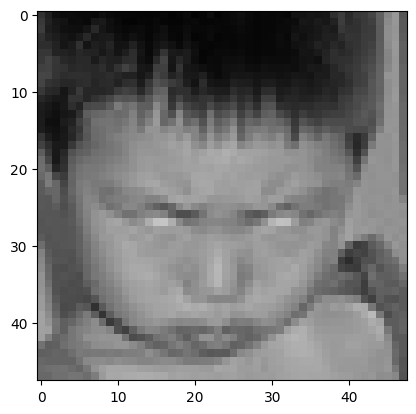

In [6]:
plt.imshow(img_array)

In [8]:
Datadirectory = "train/" ##training dataset

In [9]:
Classes = ["0","1","2","3","4","5","6"] ##list of classes => exact name of your classes

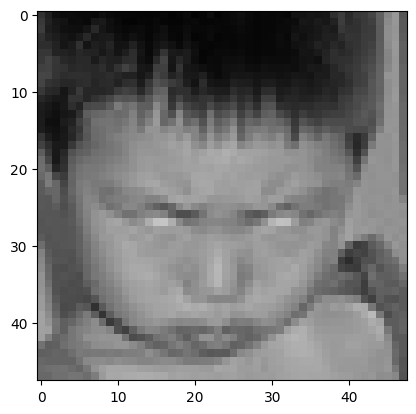

In [10]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

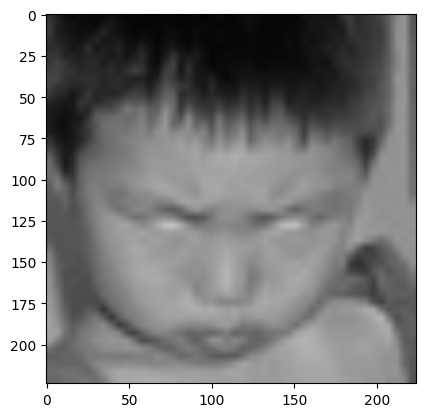

In [11]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
new_array.shape

(224, 224, 3)

# read all images

In [13]:
training_Data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                if img_array is None:
                    continue  # Skip if image couldn't be loaded
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                print(f"Error loading image {img}: {e}")
                continue

In [14]:
create_training_data()

In [15]:
print(len(training_Data))

28709


In [16]:
import random
random.shuffle(training_Data)

In [17]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)


In [18]:
X.shape

(28709, 224, 224, 3)

In [ ]:
# normalize data

X = X.astype('float32')
X = X/255.0


In [ ]:
y.shape

In [20]:
type(y)

list

In [21]:
Y=np.array(y)

In [22]:
Y.shape

(37300,)

In [23]:
Y[0]

np.int64(5)

# Deep learning model for training - Transfer Learning

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [25]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Fine-tuning: unfreeze layers from fine_tune_at onwards
fine_tune_at = 120  # for example; tune this
base_model.trainable = True  # Enable training for fine-tuning
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [27]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,038,784 (7.78 MB)

 Non-trainable params: 219,200 (856.25 KB)

# Transfer Learning - Tuning, Weights will start from last check points

In [28]:
base_input  = base_model.input

In [29]:
base_output = base_model.output

In [30]:
base_output

<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_153>

In [31]:
final_output = layers.GlobalAveragePooling2D()(base_output)
final_output = layers.Dense(128, activation='relu')(final_output)
final_output = layers.Dropout(0.3)(final_output)
final_output = layers.Dense(64, activation='relu')(final_output)
final_output = layers.Dropout(0.2)(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)


In [32]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_159>

In [33]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [34]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,211,463 (8.44 MB)

 Non-trainable params: 219,200 (856.25 KB)

In [35]:
# Compile the model
new_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [36]:
# Early stopping configuration
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6
)


In [37]:
history = new_model.fit(
    X, Y,
    epochs=10,
    batch_size=32,
    validation_split=0.1,  # 10% validation
    callbacks=[early_stop,reduce_lr],
    shuffle=True
)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 217s 200ms/step - accuracy: 0.4195 - loss: 1.4932 - val_accuracy: 0.4480 - val_loss: 1.8983 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 208s 198ms/step - accuracy: 0.5625 - loss: 1.1673 - val_accuracy: 0.3898 - val_loss: 2.7717 - learning_rate: 0.0010
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 208s 198ms/step - accuracy: 0.6109 - loss: 1.0443 - val_accuracy: 0.2949 - val_loss: 2.7848 - learning_rate: 0.0010
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 208s 198ms/step - accuracy: 0.7039 - loss: 0.8223 - val_accuracy: 0.6319 - val_loss: 0.9824 - learning_rate: 2.0000e-04
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 208s 198ms/step - accuracy: 0.7768 - loss: 0.6374 - val_accuracy: 0.6397 - val_loss: 1.0112 - learning_rate: 2.0000e-04
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 208s 198ms/step - accuracy: 0.8297 - loss: 0.4863 - val_accuracy: 0.7088 - val_loss: 0.8352 - learning_rate: 2.0000e-04
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━

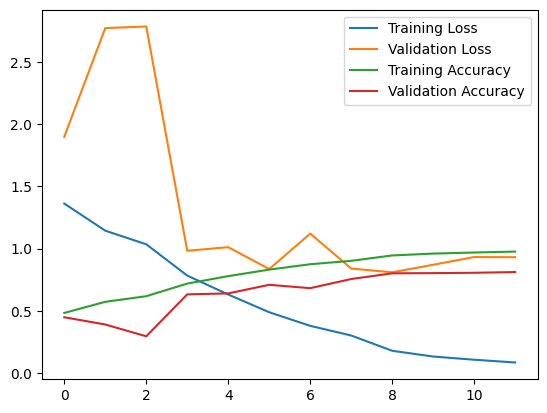

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [40]:
save_path = "mod_my_model01.keras"
new_model.save(save_path)


# load and bla bla bla


In [10]:
save_path = "mod_my_model01.keras"

In [11]:
new_model = tf.keras.models.load_model(save_path)

In [12]:
new_model.evaluate

<bound method TensorFlowTrainer.evaluate of <Functional name=functional, built=True>>

In [ ]:
# Try to read an image file (change filename if needed)
frame = cv2.imread('R.jpeg')  # Using R.jpeg from your folder
if frame is None:
    print("Warning: Could not read image file. Please check the filename.")

In [14]:
frame.shape

(195, 474, 3)

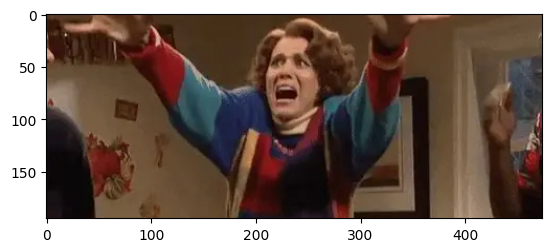

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [17]:
gray.shape

(195, 474)

In [18]:
faceCascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

In [19]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

    # Draw rectangle around detected face
    cv2.rectangle(frame, (x, y), (x+w, y+h), ( 0, 0, 255), 2)

    # Detect faces again inside ROI
    facess = faceCascade.detectMultiScale(roi_gray)

    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]


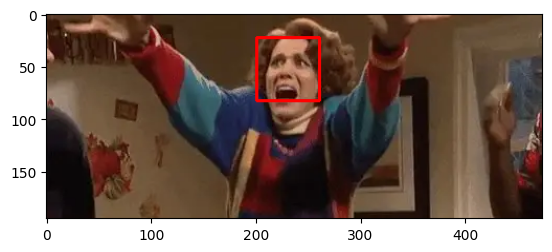

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

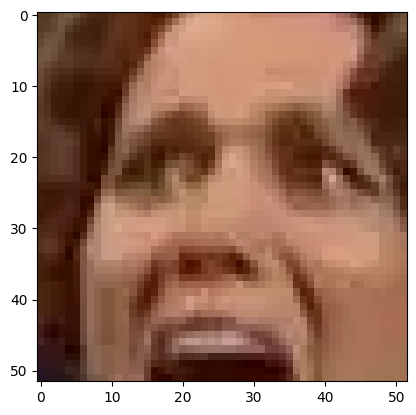

In [21]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [22]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0
final_image.shape

(1, 224, 224, 3)

In [23]:
prediction = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [24]:
prediction[0]

array([2.0258991e-02, 1.5773655e-04, 9.4755590e-01, 6.0873816e-04,
       7.7891420e-04, 2.5661528e-02, 4.9782726e-03], dtype=float32)

In [25]:
np.argmax(prediction)

np.int64(2)

In [59]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# ---------------------------------------------------------
# 1. Load Haar cascade and trained model
# ---------------------------------------------------------
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# your trained Keras model (make sure save_path is defined above)
new_model = tf.keras.models.load_model(save_path)

# emotion labels in the same order used when training
EMOTION_LABELS = [
    "Angry",     # 0
    "Disgust",   # 1
    "Fear",      # 2
    "Happy",     # 3
    "Neutral",   # 4
    "Sad",       # 5
    "Surprise"   # 6
]

# Color mapping dictionary (BGR format for OpenCV)
COLOR_MAP = {
    "Happy": (0, 255, 0),        # Green
    "Neutral": (255, 0, 0),      # Blue
    "Surprise": (255, 255, 0),   # Cyan
    "Sad": (0, 0, 255),          # Red
    "Angry": (0, 140, 255),      # Orange
    "Fear": (255, 0, 255),       # Purple
    "Disgust": (42, 42, 165)     # Brown
}

# ---------------------------------------------------------
# 2. Open webcam
# ---------------------------------------------------------
cap = cv2.VideoCapture(1)  # try 1 first
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # fallback to 0

if not cap.isOpened():
    raise IOError("Cannot open webcam")

font = cv2.FONT_HERSHEY_SIMPLEX

# position + size of black info-box at the top-left
x1, y1, w1, h1 = 0, 0, 175, 75

# ---------------------------------------------------------
# 3. Main loop
# ---------------------------------------------------------
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    status = "No face"
    color = (0, 0, 255)  # default color (red) if no emotion match

    for (x, y, w, h) in faces:
        roi_color = frame[y:y + h, x:x + w]

        # crop & preprocess for the model
        final_image = cv2.resize(roi_color, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)   # shape: (1, 224, 224, 3)
        final_image = final_image / 255.0

        # prediction
        Predictions = new_model.predict(final_image, verbose=0)
        emotion_index = int(np.argmax(Predictions))
        status = EMOTION_LABELS[emotion_index]

        # choose color based on predicted emotion
        color = COLOR_MAP.get(status, (0, 0, 255))

        # draw colored rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

        # for now we only handle the first detected face
        break

    # -----------------------------------------------------
    # 4. Draw black header box + emotion text on top
    # -----------------------------------------------------
    # black filled rectangle (info box)
    cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)

    # small status text in the top box (same color as emotion)
    cv2.putText(
        frame,
        status,
        (x1 + 10, y1 + int(h1 / 2)),
        font,
        0.7,
        color,
        2,
        cv2.LINE_4,
    )

    # big text in the middle of the frame
    cv2.putText(
        frame,
        status,
        (100, 150),
        font,
        3,
        color,
        2,
        cv2.LINE_4,
    )

    cv2.imshow("Emotion Detection", frame)

    # press q or ESC to quit
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q") or key == 27:
        break

# ---------------------------------------------------------
# 5. Cleanup
# ---------------------------------------------------------
cap.release()
cv2.destroyAllWindows()


In [ ]:
EMOTION_LABELS = [
    "Angry",     # 0
    "Disgust",   # 1
    "Fear",      # 2
    "Happy",     # 3
    "Neutral",   # 4
    "Sad",       # 5
    "Surprise"   # 6
]

In [44]:
Classes = ["0","1","2","3","4","5","6"] 


In [ ]:
import os
import cv2
import numpy as np

EMOTION_LABELS = [
    "Angry",     # 0
    "Disgust",   # 1
    "Fear",      # 2
    "Happy",     # 3
    "Neutral",   # 4
    "Sad",       # 5
    "Surprise"   # 6
]

    
test_dir = "test"
img_size = 224

test_images = []
test_labels = []

for class_idx in range(7):  # 0 to 6
    folder = os.path.join(test_dir, str(class_idx))

    for fname in os.listdir(folder):
        img_path = os.path.join(folder, fname)

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (img_size, img_size))
        test_images.append(img)
        test_labels.append(class_idx)

X_test = np.array(test_images, dtype="float32") / 255.0
y_test = np.array(test_labels, dtype="int32")

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (7178, 224, 224, 3)
y_test shape: (7178,)


In [53]:
test_loss, test_acc = new_model.evaluate(X_test, y_test, batch_size=32)
print("Test loss :", test_loss)
print("Test acc  :", test_acc)


225/225 ━━━━━━━━━━━━━━━━━━━━ 38s 160ms/step - accuracy: 0.6624 - loss: 1.5656
Test loss : 1.5656224489212036
Test acc  : 0.6624407768249512


In [55]:
pred_probs = new_model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)

for i in range(100):  
    true_name = EMOTION_LABELS[y_test[i]]
    pred_name = EMOTION_LABELS[pred_labels[i]]
    print(f"Image {i}: true = {true_name}, predicted = {pred_name}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 155ms/step
Image 0: true = Angry, predicted = Fear
Image 1: true = Angry, predicted = Angry
Image 2: true = Angry, predicted = Surprise
Image 3: true = Angry, predicted = Surprise
Image 4: true = Angry, predicted = Angry
Image 5: true = Angry, predicted = Fear
Image 6: true = Angry, predicted = NeutralSad
Image 7: true = Angry, predicted = Angry
Image 8: true = Angry, predicted = Angry
Image 9: true = Angry, predicted = Angry
Image 10: true = Angry, predicted = Disgust
Image 11: true = Angry, predicted = NeutralSad
Image 12: true = Angry, predicted = Angry
Image 13: true = Angry, predicted = NeutralSad
Image 14: true = Angry, predicted = NeutralSad
Image 15: true = Angry, predicted = Fear
Image 16: true = Angry, predicted = Angry
Image 17: true = Angry, predicted = Fear
Image 18: true = Angry, predicted = Surprise
Image 19: true = Angry, predicted = Angry
Image 20: true = Angry, predicted = Happy
Image 21: true = Angry, predicted = Angry
Image 22: true 

IndexError: list index out of range